<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Discretización por Arboles de decisión </font> </center>

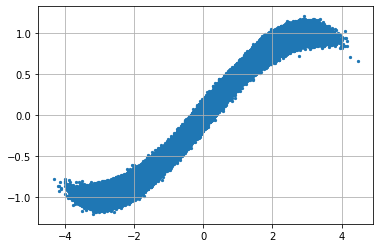

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df=pd.read_csv('dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

---
# Discretización por Árboles de decisión

In [2]:
from sklearn.tree import DecisionTreeRegressor,plot_tree  # Discretización por árboles de decisión
from sklearn.preprocessing import KBinsDiscretizer        # Discretización por ancho y frecuencia constantes y kmeans

In [3]:
# Modelo con datos sin discretizar
lin_SD=LinearRegression()
lin_SD.fit(df[['x']],df['y'])
predict_SD=lin_SD.predict(df[['x']])


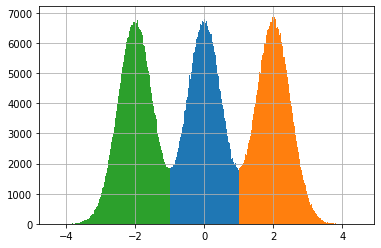

In [4]:
# Centroides
k=3
ctr=np.random.uniform(df.x.min(),df.x.max(),k)
ctr_anterior=np.ones(k)*np.inf
eps=1e-6
while(np.abs(ctr-ctr_anterior).sum()>eps): # Minkowski con p=1
    dif=[]
    for c_i in ctr:
        dif.append(np.abs(c_i-df[['x']].values))
    distancias=np.concatenate(dif,axis=1)
    grupos=np.argmin(distancias,axis=1)
    df_copia=df.copy()
    df_copia['kmeans']=grupos
    ctr_anterior=ctr.copy()
    ctr=df_copia.groupby('kmeans')['x'].mean().values
df['kmeans']=grupos
df.groupby('kmeans')['x'].hist(bins='auto')
ctr

# Modelo con datos discretizados con K-means
lin_kmeans=LinearRegression()
x=ctr.reshape(-1,1)
y=df.groupby('kmeans')['y'].mean()
lin_kmeans.fit(x,y)
predict_kmeans=lin_kmeans.predict(df[['x']].values)


In [5]:
k=3
disc_tree=DecisionTreeRegressor(max_leaf_nodes=k)
disc_tree.fit(df[['x']],df['y'])
df['tree']=disc_tree.predict(df[['x']])
df['tree'].unique(),df.groupby('tree')['y'].mean()

(array([-0.6113408 ,  0.19537379,  0.82473443]),
 tree
 -0.611341   -0.611341
  0.195374    0.195374
  0.824734    0.824734
 Name: y, dtype: float64)

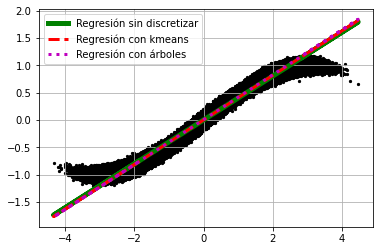

In [6]:
lin_tree=LinearRegression()
x=df.groupby('tree')['x'].mean().values.reshape(-1,1)
lin_tree.fit(x,df['tree'].unique())
predict_tree=lin_tree.predict(df[['x']].values)

plt.scatter(df.x,df.y,s=5,c='k')
plt.plot(df.x,predict_SD,'g',lw=5,label='Regresión sin discretizar')
plt.plot(df.x,predict_kmeans,'--r',label='Regresión con kmeans',lw=3)
plt.plot(df.x,predict_tree,':m',label='Regresión con árboles',lw=3)
plt.legend()
plt.grid()

In [7]:
lin_SD.coef_,lin_SD.intercept_

(array([0.40165508]), 0.0001864860861957386)

In [8]:
lin_tree.coef_,lin_tree.intercept_

(array([0.41117747]), 0.006168076742431)

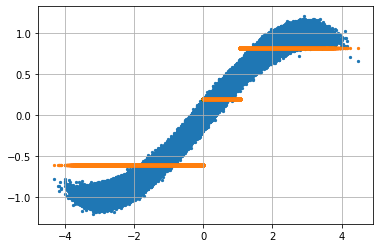

In [9]:
plt.scatter(df.x,df.y,s=5)
plt.scatter(df.x,df.tree,s=5)
plt.grid()

[Text(133.92000000000002, 181.2, 'X[0] <= -0.007\nmse = 0.478\nsamples = 1500000\nvalue = 0.0'),
 Text(66.96000000000001, 108.72, 'mse = 0.106\nsamples = 746770\nvalue = -0.611'),
 Text(200.88000000000002, 108.72, 'X[0] <= 1.071\nmse = 0.108\nsamples = 753230\nvalue = 0.607'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.021\nsamples = 261030\nvalue = 0.195'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.017\nsamples = 492200\nvalue = 0.825')]

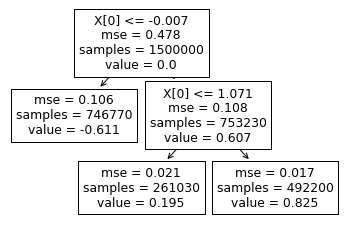

In [10]:
plot_tree(disc_tree)

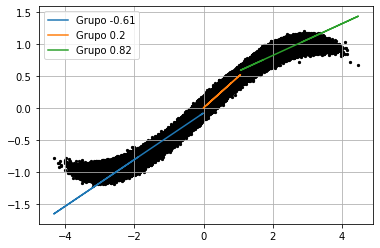

In [11]:
plt.scatter(df.x,df.y,s=5,c='k')
for h_i in df['tree'].unique():
    x=df[df['tree']==h_i][['x']]
    y=df[df['tree']==h_i]['y']
    lin_model = LinearRegression()
    lin_model.fit(x.values, y.values)
    predict_lin = lin_model.predict(x)
    #plt.plot(x,lin_grupos[-1].predict(x),label='Grupo '+str(round(h_i,2)))
    plt.plot(x.values, predict_lin,label='Grupo '+str(round(h_i,2)))
plt.legend()
plt.grid()